<a href="https://colab.research.google.com/github/gmateesc/Python/blob/master/stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!which python
#!python --version

#%pip show PyYaml
%pip show statsmodels

In [18]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [19]:
plt.rcParams['figure.figsize'] = (10, 7.5)

# Simulate MA(2) process

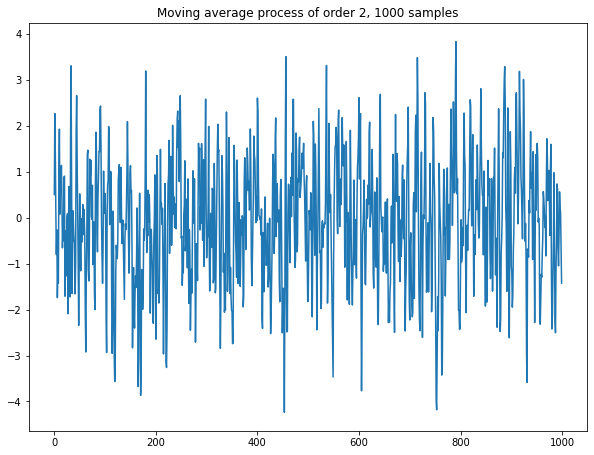

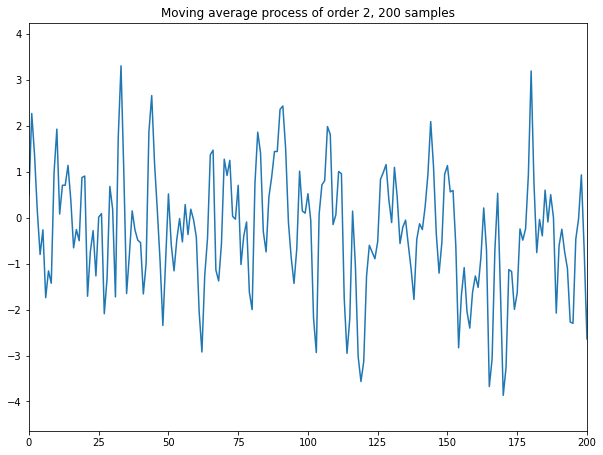

In [26]:
ma2 = np.array([1.0, 0.9, 0.3])
ar2 = np.array([1.0, 0.0, 0.0])
#print(ma2)
#print(ar2)
MA2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)
plt.plot(MA2_process)
plt.title('Moving average process of order 2, 1000 samples')
plt.show()
plt.title('Moving average process of order 2, 200 samples')
plt.plot(MA2_process)
plt.xlim(0, 200)
plt.show()

# Display the autocorrelation function for lags up to 20

### if the autocorrelation for lags > 2 is small, this is MA(2)

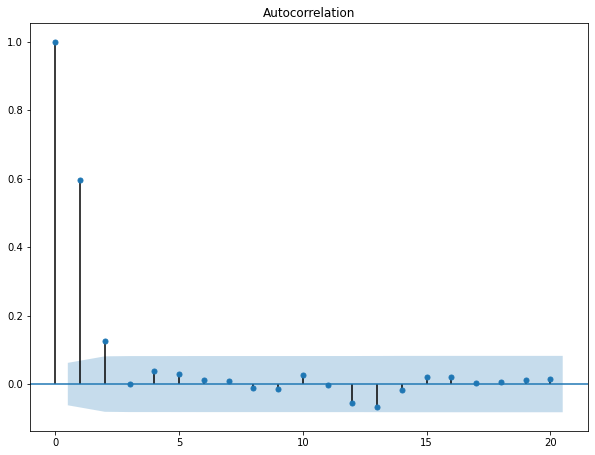

In [27]:
plot_acf(MA2_process, lags=20);